# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv
/kaggle/input/widsdatathon2024-challenge1/training.csv
/kaggle/input/widsdatathon2024-challenge1/test.csv


In [2]:
# store data
train = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/training.csv")
test = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/test.csv")

# Checking out shape of data and target variable

In [3]:
# finding the number of train and test samples
print("Number of train samples are",train.shape)
print("Number of test samples are",test.shape) 

Number of train samples are (12906, 83)
Number of test samples are (5792, 82)


In [4]:
# target attribute is a binary value
train['DiagPeriodL90D'].unique()

array([1, 0])

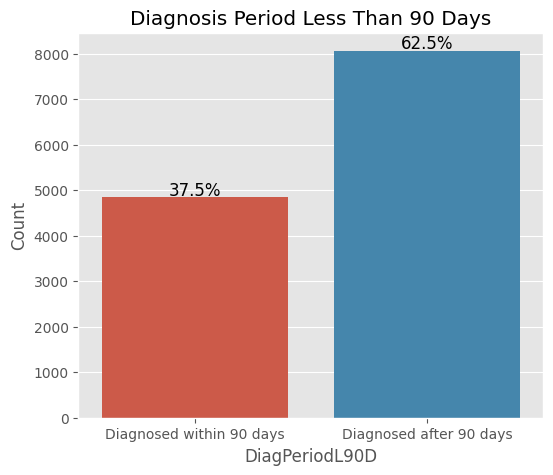

In [5]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(train, x='DiagPeriodL90D')

total = len(train['DiagPeriodL90D'])  
labels = ['Diagnosed within 90 days', 'Diagnosed after 90 days']
ax.set_xticklabels(labels)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)

plt.title('Diagnosis Period Less Than 90 Days')
plt.xlabel('DiagPeriodL90D')
plt.ylabel('Count')
plt.show()

**Drop the patient_gender attribute since there's only one unique gender - Female.**

In [6]:
print(train['patient_gender'].unique())
print(test['patient_gender'].unique())

['F']
['F']


In [7]:
train.drop(columns=['patient_gender'], inplace=True)
test.drop(columns=['patient_gender'], inplace=True)

print("Number of train samples are",train.shape)
print("Number of test samples are",test.shape) 

Number of train samples are (12906, 82)
Number of test samples are (5792, 81)


In [8]:
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C773,...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


## **Cleaning Data**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   bmi                                    3941 non-null   float64
 7   breast_cancer_diagnosis_code           12906 non-null  object 
 8   breast_cancer_diagnosis_desc           12906 non-null  object 
 9   metastatic_cancer_diagnosis_code       12906 non-null  object 
 10  metastatic_first_novel_treatment       24 non-null     object 
 11  me

We can see some attributes with NULL values. Moreover, most of the attributes are numeric while the rest are categorical.  

In [10]:
missing_data = []
# percentage of mising data
for col in train.columns:
    percent_missing = (train[col].isnull().sum() / train.shape[0]) * 100
    if percent_missing > 0:
        missing_data.append((col, percent_missing))
        
# Sort the list by missing percentage in descending order
missing_data_sorted = sorted(missing_data, key=lambda x: x[1], reverse=True)
for col, percent_missing in missing_data_sorted:
    print(f'{col} : {percent_missing:.2f}% missing')

metastatic_first_novel_treatment : 99.81% missing
metastatic_first_novel_treatment_type : 99.81% missing
bmi : 69.46% missing
patient_race : 49.47% missing
payer_type : 13.97% missing
Region : 0.40% missing
Division : 0.40% missing
patient_state : 0.40% missing
Ozone : 0.22% missing
PM25 : 0.22% missing
N02 : 0.22% missing
family_size : 0.03% missing
family_dual_income : 0.03% missing
income_household_median : 0.03% missing
income_household_under_5 : 0.03% missing
income_household_5_to_10 : 0.03% missing
income_household_10_to_15 : 0.03% missing
income_household_15_to_20 : 0.03% missing
income_household_20_to_25 : 0.03% missing
income_household_25_to_35 : 0.03% missing
income_household_35_to_50 : 0.03% missing
income_household_50_to_75 : 0.03% missing
income_household_75_to_100 : 0.03% missing
income_household_100_to_150 : 0.03% missing
income_household_150_over : 0.03% missing
income_household_six_figure : 0.03% missing
home_ownership : 0.03% missing
home_value : 0.03% missing
rent_me

**View attributes with large missing data**

In [11]:
# print unique values and count of the cols with most missing data
print(train['metastatic_first_novel_treatment'].value_counts())
print()
print(train['metastatic_first_novel_treatment_type'].value_counts())
print()
print(train['patient_race'].value_counts())

metastatic_first_novel_treatment
PEMBROLIZUMAB    13
OLAPARIB         11
Name: count, dtype: int64

metastatic_first_novel_treatment_type
Antineoplastics    24
Name: count, dtype: int64

patient_race
White       3588
Black       1056
Hispanic     829
Other        683
Asian        365
Name: count, dtype: int64


Let's see the relationship between these categorical attributes and the target attribute.

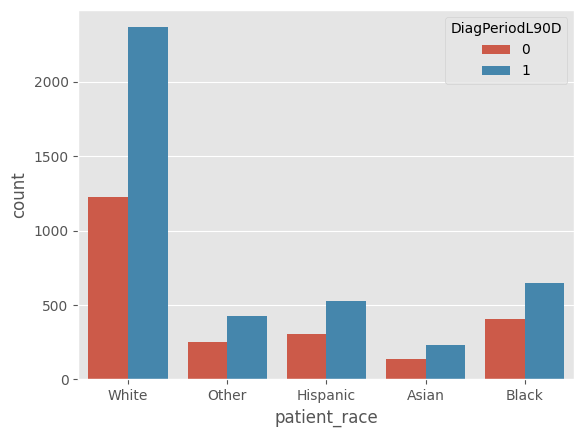

In [12]:
# cat variable 1: patient race
sns.countplot(train, x='patient_race', hue='DiagPeriodL90D')
plt.show()

Highest chance for white patients to be diagnosed the quickest within 90 days!
Lowest chance for Asians to be diagnosed ... :(

Due to the considerably large amount of missing data for this col, there is no way to impute the data because that could add unnecessary bias and data points for the race of 'White'. **Moving ahead with the project, we shall assume that disciminatory practices are not existent here. .**


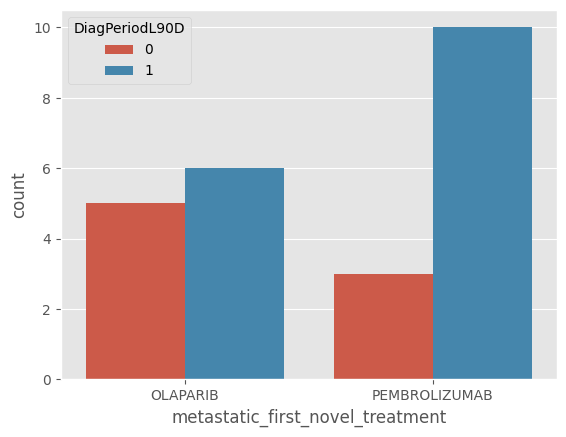

In [13]:
# cat variable 2: 
sns.countplot(train, x='metastatic_first_novel_treatment', hue='DiagPeriodL90D')
plt.show()

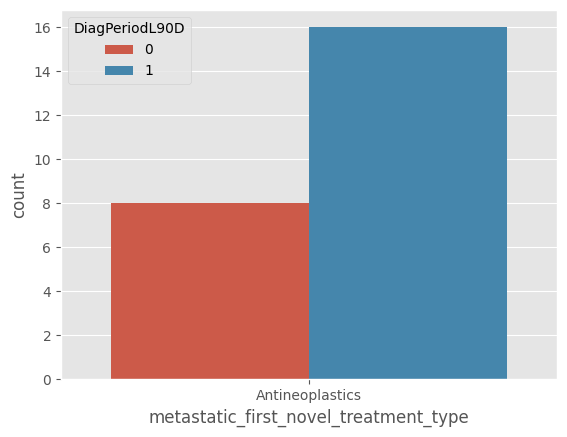

In [14]:
# cat variable 3: 
sns.countplot(train, x='metastatic_first_novel_treatment_type', hue='DiagPeriodL90D')
plt.show()

There's only one type of treatment, so with this lacking variation for this attribute, we can just drop this attribute from the dataframe.

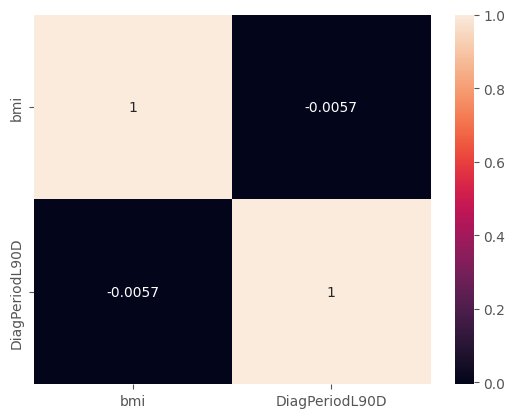

In [15]:
# correlation between continuous variable bmi and target attribute
selected_cols = ['bmi', 'DiagPeriodL90D']
sns.heatmap(train[selected_cols].corr(), annot=True)
plt.show()

There is a very weak correlation, so `bmi` is not a significant factor contributing to `DiagPeriod90LD`. 

### Dropping columns with large missing data

In [16]:
# drop the columns with high missing data.
selected_cols = ['metastatic_first_novel_treatment','metastatic_first_novel_treatment_type','bmi','patient_race']
train = train.drop(columns= selected_cols)
test = test.drop(columns= selected_cols)

print(train.shape)
print(test.shape)

(12906, 78)
(5792, 77)


In [17]:
missing_data = []
# percentage of mising data
for col in train.columns:
    percent_missing = (train[col].isnull().sum() / train.shape[0]) * 100
    if percent_missing > 0:
        missing_data.append((col, percent_missing))
        
# Sort the list by missing percentage in descending order
missing_data_sorted = sorted(missing_data, key=lambda x: x[1], reverse=True)
for col, percent_missing in missing_data_sorted:
    print(f'{col} [{train[col].dtype}] : {percent_missing:.2f}% missing')

payer_type [object] : 13.97% missing
Region [object] : 0.40% missing
Division [object] : 0.40% missing
patient_state [object] : 0.40% missing
Ozone [float64] : 0.22% missing
PM25 [float64] : 0.22% missing
N02 [float64] : 0.22% missing
family_size [float64] : 0.03% missing
family_dual_income [float64] : 0.03% missing
income_household_median [float64] : 0.03% missing
income_household_under_5 [float64] : 0.03% missing
income_household_5_to_10 [float64] : 0.03% missing
income_household_10_to_15 [float64] : 0.03% missing
income_household_15_to_20 [float64] : 0.03% missing
income_household_20_to_25 [float64] : 0.03% missing
income_household_25_to_35 [float64] : 0.03% missing
income_household_35_to_50 [float64] : 0.03% missing
income_household_50_to_75 [float64] : 0.03% missing
income_household_75_to_100 [float64] : 0.03% missing
income_household_100_to_150 [float64] : 0.03% missing
income_household_150_over [float64] : 0.03% missing
income_household_six_figure [float64] : 0.03% missing
home_

### Analysing Numeric Data 

In [18]:
num_var= train.select_dtypes(exclude='object')
# viewing correlation between numeric variables and target variable'DiagPeriodL90D' and sort them
corr_with_target = num_var.corr()['DiagPeriodL90D'].sort_values(ascending=False)

# Drop 'DiagPeriodL90D' itself
corr_with_target = corr_with_target.drop('DiagPeriodL90D')

# Display the list of correlation values
print("Correlation with DiagPeriodL90D:\n")
print(corr_with_target)

Correlation with DiagPeriodL90D:

patient_age                  0.055634
education_bachelors          0.037704
patient_zip3                 0.036372
income_individual_median     0.033206
home_value                   0.030163
                               ...   
commute_time                -0.027375
health_uninsured            -0.028565
income_household_25_to_35   -0.029044
widowed                     -0.031544
education_less_highschool   -0.035954
Name: DiagPeriodL90D, Length: 70, dtype: float64


The correlations are still considered weak. But we should still keep them.

In [19]:
num_var.describe()

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,12.862036,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,2.324922,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,1.500000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,11.292105,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,12.442647,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,14.026667,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,25.471429,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


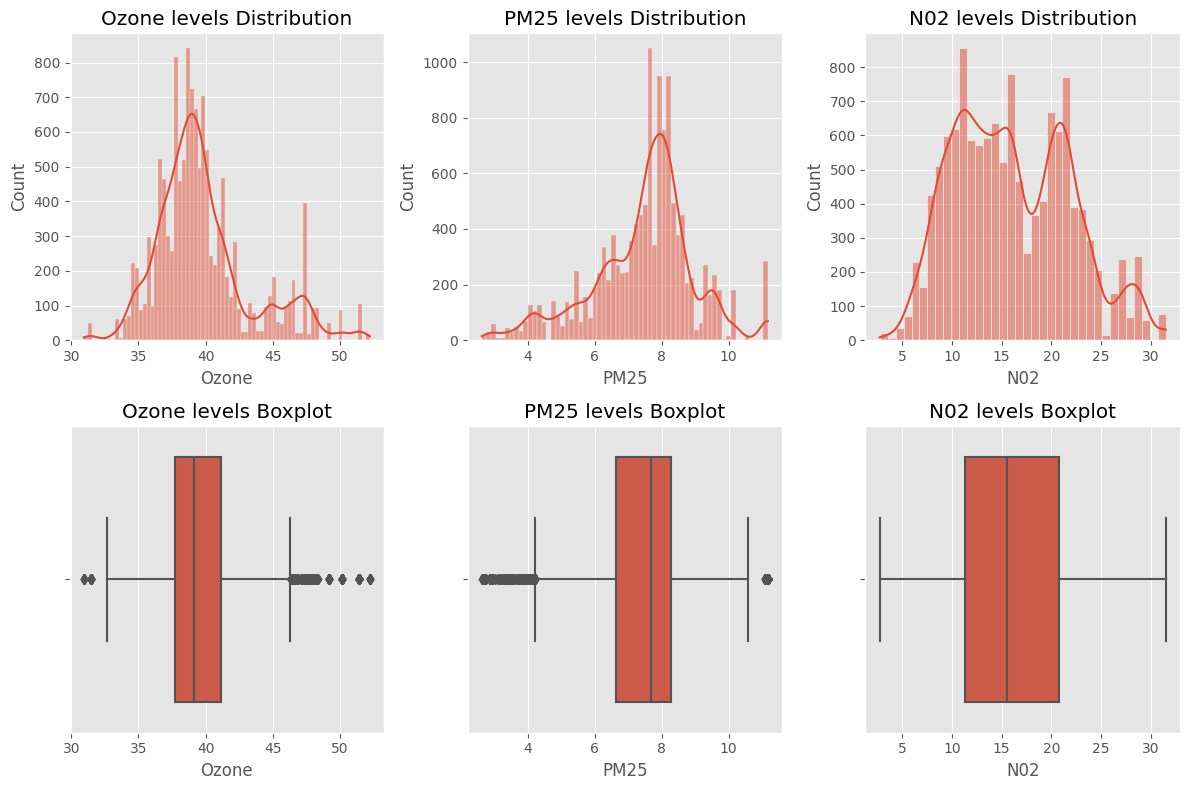

In [20]:
# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot histograms in the top row
sns.histplot(train['Ozone'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Ozone levels Distribution')

sns.histplot(train['PM25'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('PM25 levels Distribution')

sns.histplot(train['N02'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('N02 levels Distribution')

# Plot boxplots in the bottom row
sns.boxplot(x='Ozone', data=train, ax=axes[1, 0])
axes[1, 0].set_title('Ozone levels Boxplot')

sns.boxplot(x='PM25', data=train, ax=axes[1, 1])
axes[1, 1].set_title('PM25 levels Boxplot')

sns.boxplot(x='N02', data=train, ax=axes[1, 2])
axes[1, 2].set_title('N02 levels Boxplot')

plt.tight_layout()
plt.show()

#### **Handling missing numeric data**

- Due to skew, null values in the features `Ozone`, `PM25` & `N02` are handled using median.
- For other attributes with very little missing data, impute the missing data with the mean.

In [21]:
# impute for both train and test data
for col in num_var:
    if col != 'DiagPeriodL90D':
        if col == 'Ozone' or col == 'PM25' or col == 'N02':
            train[col].fillna(train[col].median(), inplace=True)
            test[col].fillna(test[col].median(), inplace=True)
        else:
            train[col].fillna(train[col].mean(), inplace=True)
            test[col].fillna(test[col].mean(), inplace=True)

In [22]:
# ensure no missing numeric data in train set
for col in num_var.drop('DiagPeriodL90D', axis=1):
    print(f'{col} : {train[col].isnull().sum()}')

patient_id : 0
patient_zip3 : 0
patient_age : 0
population : 0
density : 0
age_median : 0
age_under_10 : 0
age_10_to_19 : 0
age_20s : 0
age_30s : 0
age_40s : 0
age_50s : 0
age_60s : 0
age_70s : 0
age_over_80 : 0
male : 0
female : 0
married : 0
divorced : 0
never_married : 0
widowed : 0
family_size : 0
family_dual_income : 0
income_household_median : 0
income_household_under_5 : 0
income_household_5_to_10 : 0
income_household_10_to_15 : 0
income_household_15_to_20 : 0
income_household_20_to_25 : 0
income_household_25_to_35 : 0
income_household_35_to_50 : 0
income_household_50_to_75 : 0
income_household_75_to_100 : 0
income_household_100_to_150 : 0
income_household_150_over : 0
income_household_six_figure : 0
income_individual_median : 0
home_ownership : 0
housing_units : 0
home_value : 0
rent_median : 0
rent_burden : 0
education_less_highschool : 0
education_highschool : 0
education_some_college : 0
education_bachelors : 0
education_graduate : 0
education_college_or_above : 0
education_

In [23]:
# ensure no missing numeric data in test set
for col in num_var.drop('DiagPeriodL90D', axis=1):
    print(f'{col} : {test[col].isnull().sum()}')

patient_id : 0
patient_zip3 : 0
patient_age : 0
population : 0
density : 0
age_median : 0
age_under_10 : 0
age_10_to_19 : 0
age_20s : 0
age_30s : 0
age_40s : 0
age_50s : 0
age_60s : 0
age_70s : 0
age_over_80 : 0
male : 0
female : 0
married : 0
divorced : 0
never_married : 0
widowed : 0
family_size : 0
family_dual_income : 0
income_household_median : 0
income_household_under_5 : 0
income_household_5_to_10 : 0
income_household_10_to_15 : 0
income_household_15_to_20 : 0
income_household_20_to_25 : 0
income_household_25_to_35 : 0
income_household_35_to_50 : 0
income_household_50_to_75 : 0
income_household_75_to_100 : 0
income_household_100_to_150 : 0
income_household_150_over : 0
income_household_six_figure : 0
income_individual_median : 0
home_ownership : 0
housing_units : 0
home_value : 0
rent_median : 0
rent_burden : 0
education_less_highschool : 0
education_highschool : 0
education_some_college : 0
education_bachelors : 0
education_graduate : 0
education_college_or_above : 0
education_

### Analysing Categorical Variables

**This notebook will not touch on NLP analysis, hence dropping `breast_cancer_diagnosis_desc`.**

In [24]:
train.drop('breast_cancer_diagnosis_desc', axis=1, inplace=True)
test.drop('breast_cancer_diagnosis_desc', axis=1, inplace=True)

In [25]:
# number of missing values in categorical cols in train set
cat_var = train.select_dtypes(include='object')
for col in cat_var:
    print(f'{col} : {train[col].isnull().sum()}')

payer_type : 1803
patient_state : 51
breast_cancer_diagnosis_code : 0
metastatic_cancer_diagnosis_code : 0
Region : 52
Division : 52


In [26]:
# number of missing values in categorical cols in test set
for col in cat_var:
    print(f'{col} : {test[col].isnull().sum()}')

payer_type : 760
patient_state : 21
breast_cancer_diagnosis_code : 0
metastatic_cancer_diagnosis_code : 0
Region : 21
Division : 21


#### Impute missing data in categorical columns with mode.

In [27]:
for col in cat_var:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

print("Train data missing values")
for col in cat_var:
    print(f'{col} : {train[col].isnull().sum()}')
print("\nTest data missing values")
for col in cat_var:
    print(f'{col} : {test[col].isnull().sum()}')

Train data missing values
payer_type : 0
patient_state : 0
breast_cancer_diagnosis_code : 0
metastatic_cancer_diagnosis_code : 0
Region : 0
Division : 0

Test data missing values
payer_type : 0
patient_state : 0
breast_cancer_diagnosis_code : 0
metastatic_cancer_diagnosis_code : 0
Region : 0
Division : 0


#### Label encoding categorical data where each unique category in a categorical variable is assigned an integer value so that ML algorithm can process it more easily.


In [28]:
# viewing unique values of each categorical var before label encoding
print("Payer Type:")
print(train['payer_type'].unique())
print("\nPatient State:")
print(train['patient_state'].unique())
print("\nBreast cancer diagnosis code:")
print(train['breast_cancer_diagnosis_code'].unique())
print("\nMetastatic cancer diagnosis code:")
print(train['metastatic_cancer_diagnosis_code'].unique())
print("\nRegion:")
print(train['Region'].unique())
print("\nDivision:")
print(train['Division'].unique())

Payer Type:
['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE']

Patient State:
['CA' 'TX' 'ID' 'NY' 'IL' 'MI' 'OR' 'MT' 'KY' 'OH' 'IN' 'FL' 'CO' 'GA'
 'VA' 'MD' 'KS' 'WI' 'PA' 'NM' 'WA' 'MN' 'NC' 'AL' 'SC' 'LA' 'IA' 'TN'
 'HI' 'NE' 'AZ' 'MO' 'NV' 'SD' 'DC' 'AR' 'UT' 'WV' 'ND' 'OK' 'WY' 'DE'
 'NJ' 'MS' 'AK' 'PR' 'RI' 'CT' 'NH' 'MA']

Breast cancer diagnosis code:
['C50919' 'C50411' 'C50112' 'C50212' '1749' 'C50912' 'C50512' '1744'
 'C50412' 'C50812' 'C50911' 'C50312' 'C50311' 'C50111' '1741' 'C5091'
 'C50811' '1748' 'C50511' '1743' 'C50211' 'C50011' 'C5051' 'C50012'
 'C50419' '1742' 'C50611' 'C50612' 'C50119' 'C50819' '1746' 'C5041'
 'C50619' '19881' 'C5081' '1745' 'C50219' 'C50319' 'C50019' 'C50519'
 'C50929' 'C50021' 'C5021' 'C5011' 'C5031' 'C509' 'C50' '1759' 'C5001'
 'C50421']

Metastatic cancer diagnosis code:
['C7989' 'C773' 'C7981' 'C779' 'C7800' 'C799' 'C781' 'C786' 'C7801'
 'C7951' 'C792' 'C787' 'C771' 'C7931' 'C7982' 'C770' 'C782' 'C7949'
 'C7889' 'C7802' 'C785' 'C778' 'C7952' 'C7

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Apply LabelEncoder to each categorical column
for col in cat_var:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [30]:
# viewing unique values of each categorical var after label encoding
print("Payer Type:")
print(train['payer_type'].unique())
print("\nPatient State:")
print(train['patient_state'].unique())
print("\nBreast cancer diagnosis code:")
print(train['breast_cancer_diagnosis_code'].unique())
print("\nMetastatic cancer diagnosis code:")
print(train['metastatic_cancer_diagnosis_code'].unique())
print("\nRegion:")
print(train['Region'].unique())
print("\nDivision:")
print(train['Division'].unique())

Payer Type:
[1 0 2]

Patient State:
[ 4 43 13 33 14 21 36 25 17 34 15  9  5 10 45 20 16 47 37 31 46 22 26  1
 40 18 12 42 11 28  3 23 32 41  7  2 44 48 27 35 49  8 30 24  0 38 39  6
 29 19]

Breast cancer diagnosis code:
[48 29 18 22  7 47 35  3 30 42 46 26 25 17  0 45 41  6 34  2 21 12 33 13
 31  1 37 38 19 43  5 28 39  9 40  4 23 27 14 36 49 15 20 16 24 44 10  8
 11 32]

Metastatic cancer diagnosis code:
[41  3 39  7  8 42 11 17  9 31 26 18  1 27 40  0 12 30 20 10 16  6 32 29
 15 34  2 28 36  4 24 21  5 19 33 38 22 23 14 35 37 13 25]

Region:
[3 2 1 0]

Division:
[5 8 3 2 0 1 6 7 4]


# Model Building and Training

In [31]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, roc_auc_score, roc_curve, accuracy_score

In [32]:
import optuna
import logging
optuna.logging.set_verbosity(optuna.logging.WARNING)

## Train-validation split

In [33]:
X = train.drop('DiagPeriodL90D', axis=1)
y = train["DiagPeriodL90D"]
X_test = test # since we have to predict the output, there is no y value

# split up given train data to training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(10324, 76) (2582, 76) (10324,) (2582,)


## **Building XGBOOST Classifier Model**

In [34]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [35]:
# define objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'random_state': 42
    }
    
    clf=xgb.XGBClassifier(**params)
    
    evaluation = [(X_val, y_val)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric='error',
            early_stopping_rounds=10,verbose=False)
    

    y_pred = clf.predict(X_val)  
    accuracy = accuracy_score(y_val, y_pred)  
    print("ACCURACY:", accuracy)
    return -accuracy

In [36]:
study = optuna.create_study(direction='maximize')
# print accuracy for all 100 trials
study.optimize(objective, n_trials=100)

ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.8079008520526724
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.8071262587141751
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.8071262587141751
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.8071262587141751
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.8075135553834237
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.8075135553834237
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.6243222308288149
ACCURACY: 0.62

In [37]:
# get the best parameters
best_params = study.best_params
print(best_params)

{'n_estimators': 284, 'learning_rate': 0.0016106639226620533, 'max_depth': 8, 'subsample': 0.6293145564896503, 'colsample_bytree': 0.6853220164415101, 'gamma': 0.0036235923566915675}


In [38]:
# use the best parameters 
xgb_model = xgb.XGBClassifier(**best_params, random_state=42)
xgb_model.fit(X_train,y_train)

# Predict probabilities and classes for train set
y_train_pred_proba = xgb_model.predict_proba(X_train)[:, 1]
y_train_pred = xgb_model.predict(X_train)
# Predict probabilities and classes for validation set
y_val_pred_proba = xgb_model.predict_proba(X_val)[:, 1]
y_val_pred = xgb_model.predict(X_val)

.:. Train and Test Accuracy Score for XGB Classifier
>>Train Accuracy: 81.093%
>>Validation Accuracy: 79.202%

.:. Classification Report for XGBC
              precision    recall  f1-score   support

           0       0.90      0.50      0.64       970
           1       0.76      0.97      0.85      1612

    accuracy                           0.79      2582
   macro avg       0.83      0.73      0.75      2582
weighted avg       0.82      0.79      0.77      2582



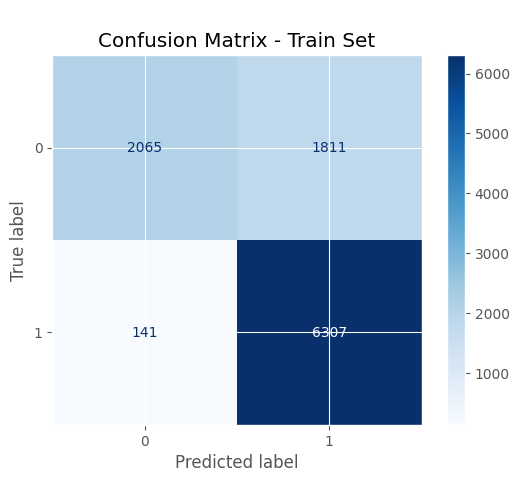

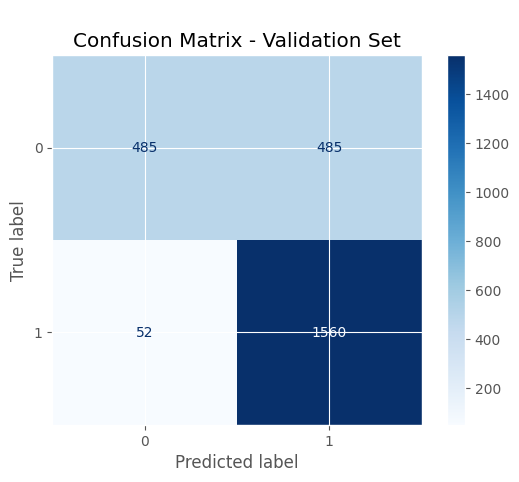

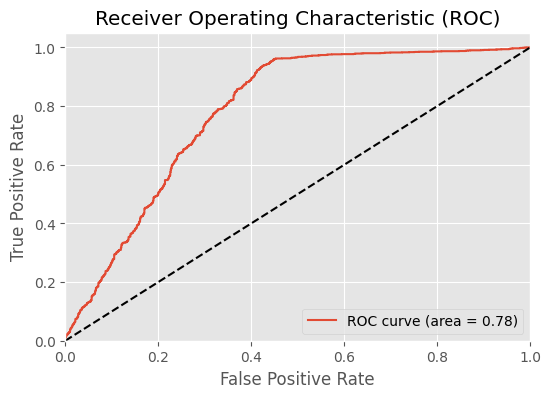

In [39]:
print(f".:. Train and Test Accuracy Score for XGB Classifier")
train_accuracy = round(accuracy_score(y_train, y_train_pred)*100, 3)
val_accuracy = round(accuracy_score(y_val, y_val_pred)*100, 3)
print(f">>Train Accuracy: {train_accuracy}%")
print(f">>Validation Accuracy: {val_accuracy}%")

print(f"\n.:. Classification Report for XGBC")
print(classification_report(y_val, y_val_pred))

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, cmap='Blues')
plt.title('\nConfusion Matrix - Train Set')
plt.show()

# Confusion matrix for val set
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, cmap='Blues')
plt.title('\nConfusion Matrix - Validation Set')
plt.show()

# ROC-AUC curve for validation set
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

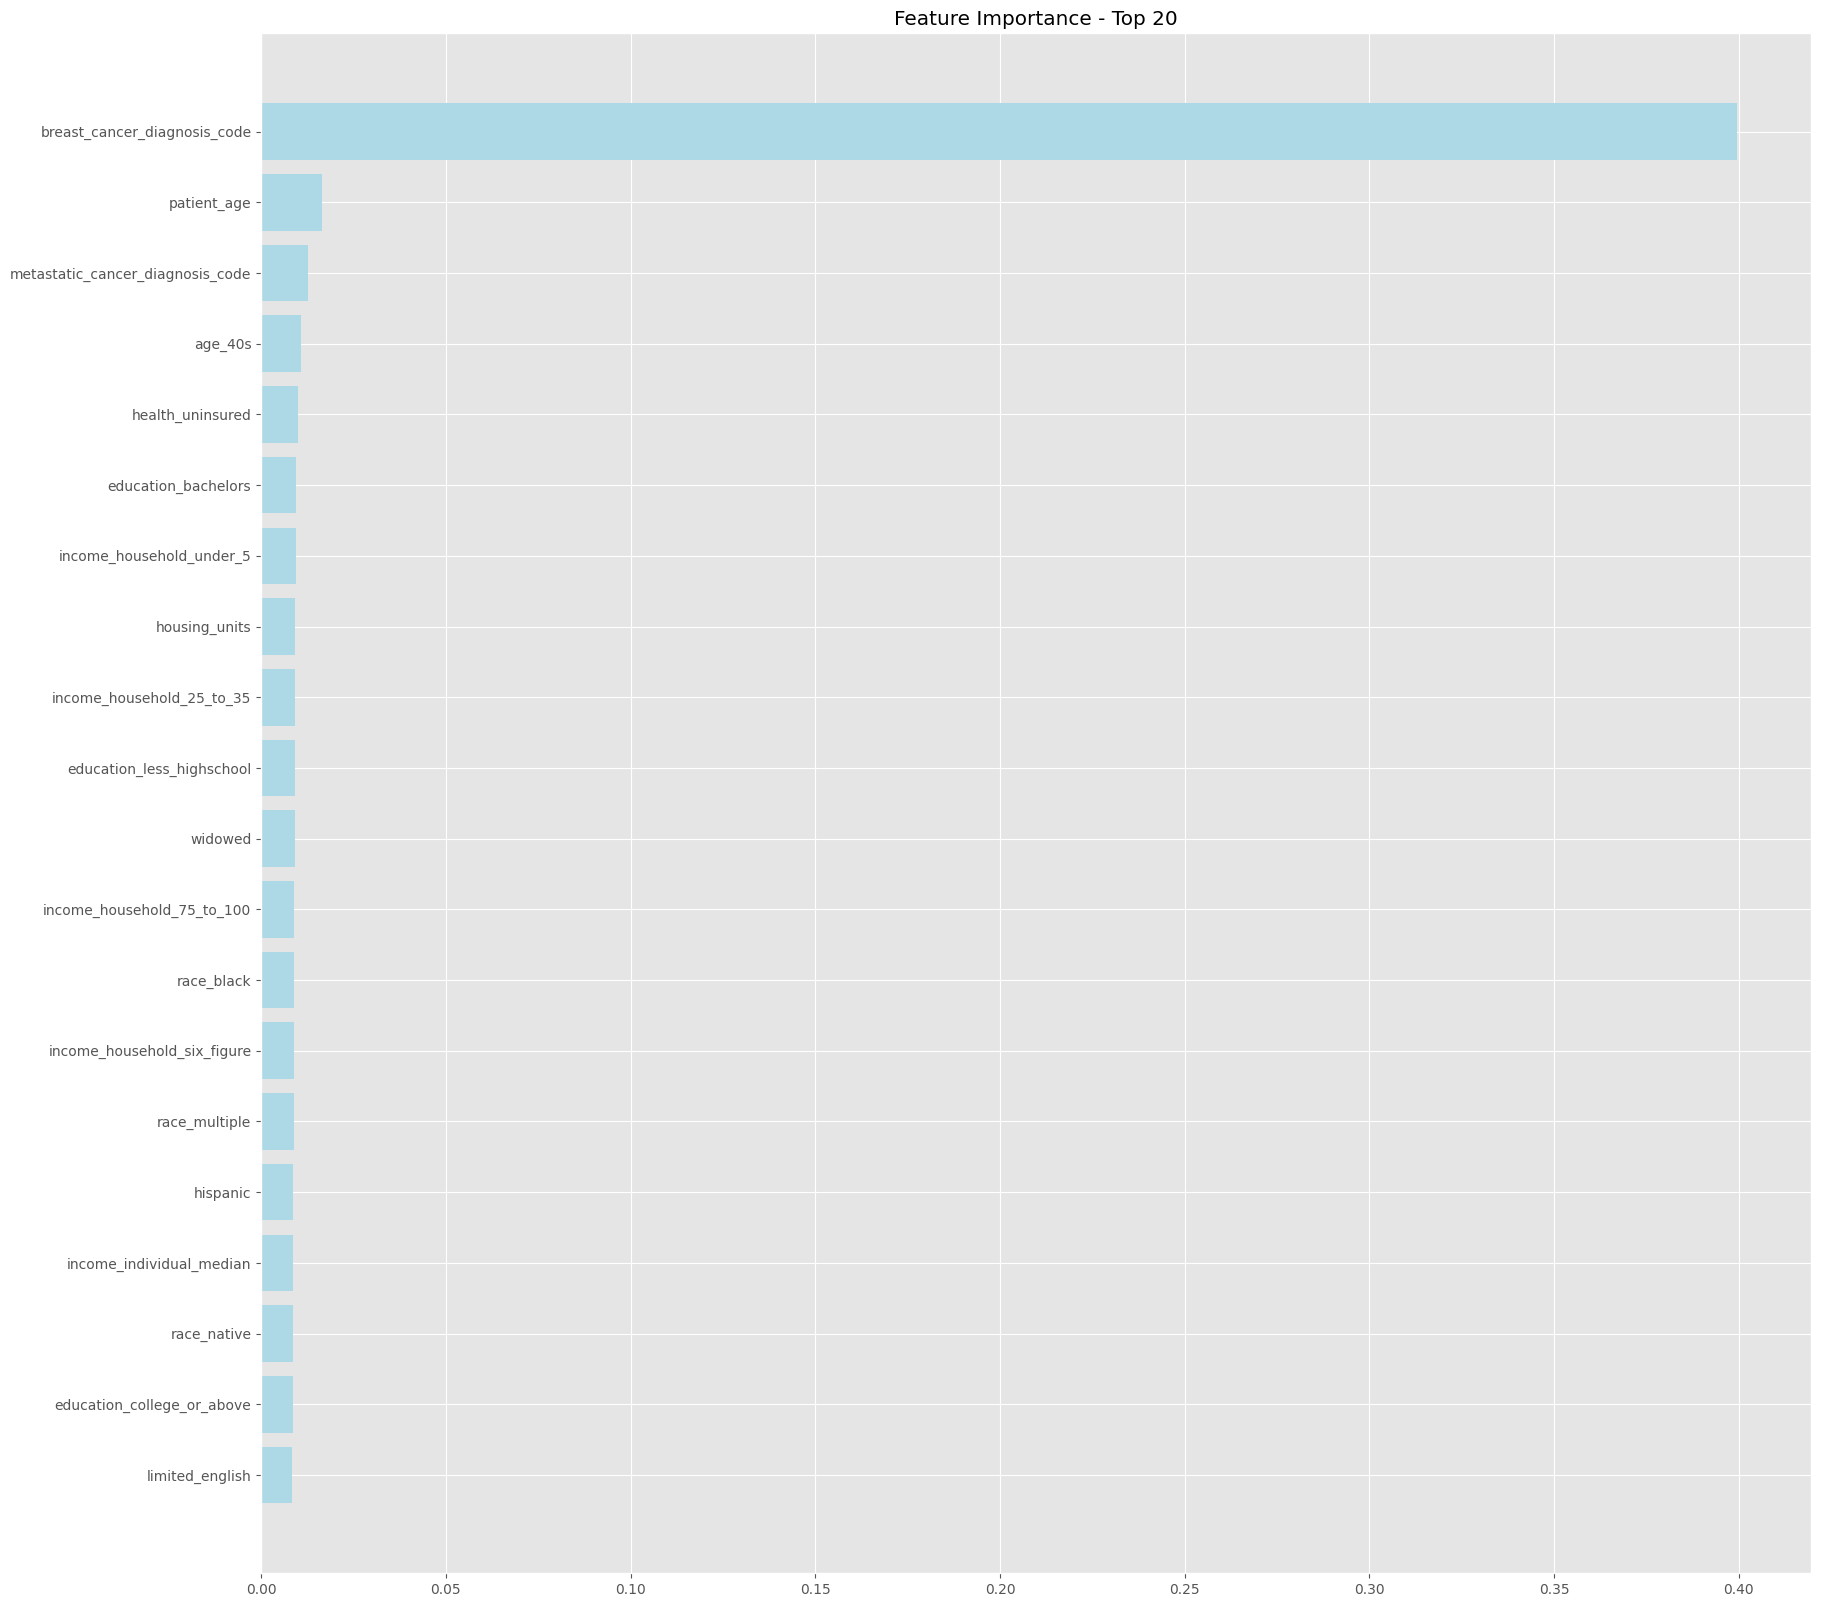

In [40]:
# view the top 20 feature importances
feature_importance = xgb_model.feature_importances_
feature_attributes = X_train.columns

sorted_attribute_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(np.arange(len(sorted_attribute_idx))[-20:], feature_importance[sorted_attribute_idx][-20:], align='center', color='lightblue')
plt.yticks(np.arange(len(sorted_attribute_idx))[-20:], feature_attributes[sorted_attribute_idx][-20:])
plt.title(f'Feature Importance - Top {20}')
plt.show()

The diagnosis code has a huge role to play in diagnosis time period.

Let's see how.

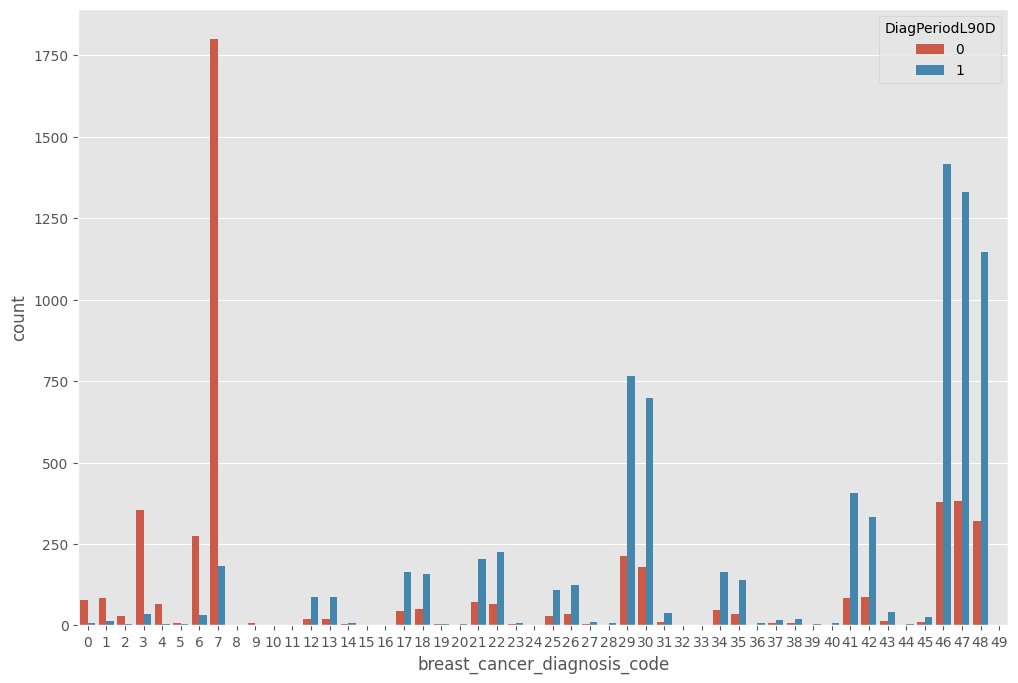

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(train,x='breast_cancer_diagnosis_code', hue='DiagPeriodL90D')
plt.show()

Very clear that more women were diagnosed in less than 90 days when the diagnosis code was >10.

# Submission

In [42]:
# test predictions
test_pred = xgb_model.predict_proba(X_test)[:,1]
submission_df = pd.DataFrame({
                'patient_id': X_test['patient_id'],
                'DiagPeriodL90D': test_pred
                })
submission_df.to_csv('submission.csv', index=False)

In [43]:
csv = pd.read_csv('submission.csv')
csv

,patient_id,DiagPeriodL90D
0,573710,0.669332
1,593679,0.665112
2,184532,0.671716
3,447383,0.658827
4,687972,0.673696
...,...,...
5787,977076,0.682937
5788,922960,0.683373
5789,759690,0.715104
5790,911717,0.480507


---
# **References/ Inspirations 💡🙏:**
1. EDA anlaysis using [Wids Starter | 0.807 LB](https://www.kaggle.com/code/waleedabujaish/wids-starter-0-807-lb) by WALEED ABUJAISH
2. Hyperparameter tuning for XGBClassifier using [WIDS2024 | EDA | XGBoost | 0.799](https://www.kaggle.com/code/uzairshafique/wids2024-eda-xgboost-0-799) by UZAIR SHAFIQUE